## Stock Price Prediction 

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
# Load the package for getting the dataset
import pandas as pd
import numpy as np
from pandas_datareader import data
from pylab import plt
import datetime
# Plotting package
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()

## S & P 500 

In [3]:
today = datetime.datetime.now().date()
a_year = datetime.timedelta(weeks=52)
start_date = today - a_year
stock_data = yf.download('^GSPC', start=start_date, end=today, interval="1d")
closing_price = stock_data['Close']
stock_data.to_csv("5&P 500 OHLCV dataset")
stock_data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-29,4432.750000,4500.140137,4431.680176,4497.629883,4497.629883,3354820000
2023-08-30,4500.339844,4521.649902,4493.589844,4514.870117,4514.870117,3064110000
2023-08-31,4517.009766,4532.259766,4507.390137,4507.660156,4507.660156,3946360000
2023-09-01,4530.600098,4541.250000,4501.350098,4515.770020,4515.770020,3246260000
2023-09-05,4510.060059,4514.290039,4496.009766,4496.830078,4496.830078,3526250000


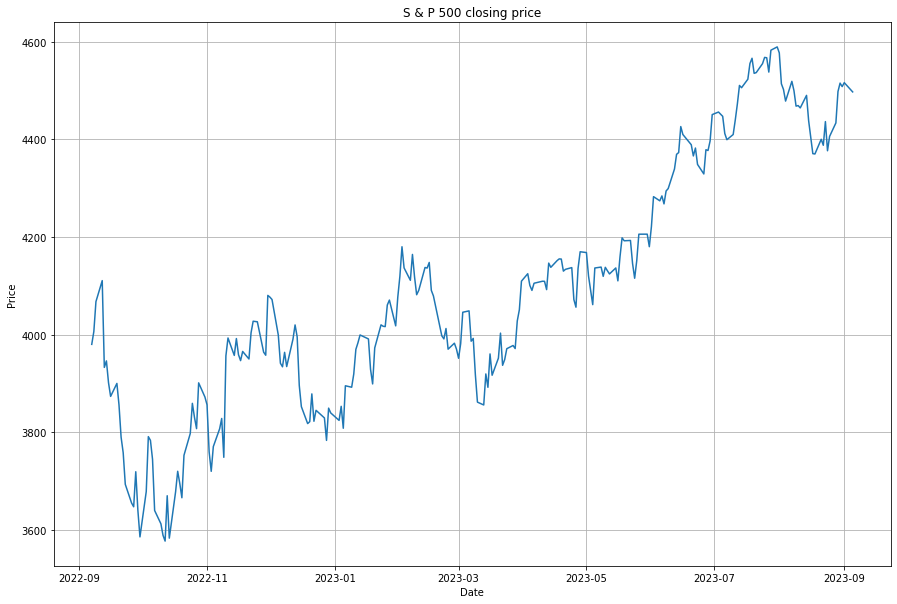

In [4]:
# Plot the trend for close price
plt.figure(figsize =(15,10))
plt.grid(True)
plt.plot(stock_data['Close'])
plt.title("S & P 500 closing price") 
plt.ylabel("Price")
plt.xlabel("Date")
plt.show()

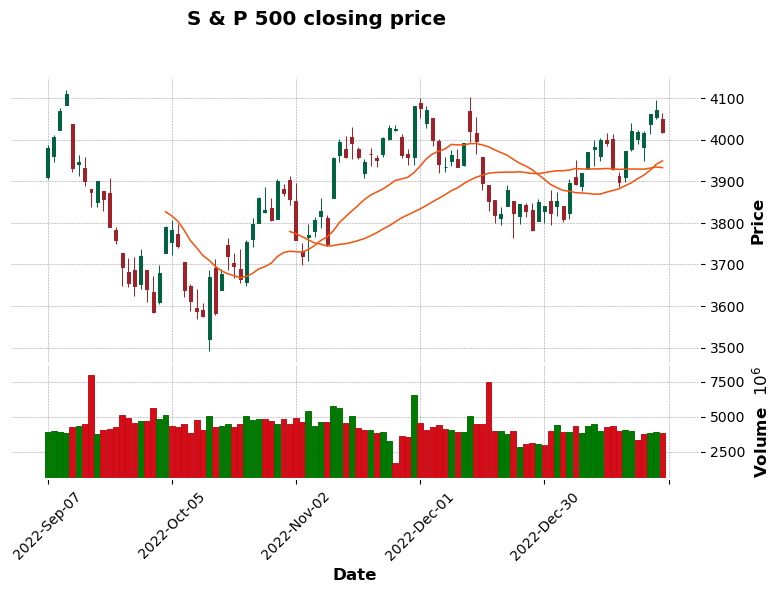

In [5]:
import mplfinance as mpf
mpf.plot(stock_data[:100],type="candle",style="charles",figratio=(10,6),mav=(20,40),volume =True, xlabel="Date",
         title = "S & P 500 closing price")

## Prepare the data sets (80% training, and 20% testing)

In [6]:

# Determine the length of your dataset
data_len = len(stock_data['Close'])

# Calculate the index to split the data (80% train, 20% test)
split_index = int(0.8 * data_len)

# Split the data into training and testing sets
train_data = stock_data['Close'][:split_index]
test_data = stock_data['Close'][split_index:]

# Reshape the data to have a single feature (2D)
train_data = train_data.values.reshape(-1, 1)
test_data = test_data.values.reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test data
train_data_normalized = scaler.fit_transform(train_data)
test_data_normalized = scaler.transform(test_data)

def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Define the number of time steps for your sequences
time_steps = 10

# Create sequences for training and testing data
X_train, y_train = create_sequences(train_data_normalized, time_steps)
X_test, y_test = create_sequences(test_data_normalized, time_steps)


NameError: name 'MinMaxScaler' is not defined

## Build and train the LSTM model 

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [8]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


NameError: name 'X_train' is not defined

In [ ]:
model.summary()

In [133]:
model.fit(X_train,y_train,validation_data=(X_train,y_train),epochs=10,batch_size=64,verbose=True)

Epoch 1/10
3/3 [==============================] - 6s 410ms/step - loss: 0.3241 - val_loss: 0.2957
Epoch 2/10
3/3 [==============================] - 0s 63ms/step - loss: 0.2830 - val_loss: 0.2586
Epoch 3/10
3/3 [==============================] - 0s 66ms/step - loss: 0.2473 - val_loss: 0.2271
Epoch 4/10
3/3 [==============================] - 0s 62ms/step - loss: 0.2174 - val_loss: 0.1988
Epoch 5/10
3/3 [==============================] - 0s 62ms/step - loss: 0.1898 - val_loss: 0.1725
Epoch 6/10
3/3 [==============================] - 0s 64ms/step - loss: 0.1640 - val_loss: 0.1477
Epoch 7/10
3/3 [==============================] - 0s 63ms/step - loss: 0.1398 - val_loss: 0.1230
Epoch 8/10
3/3 [==============================] - 0s 63ms/step - loss: 0.1148 - val_loss: 0.0976
Epoch 9/10
3/3 [==============================] - 0s 62ms/step - loss: 0.0890 - val_loss: 0.0717
Epoch 10/10
3/3 [==============================] - 0s 63ms/step - loss: 0.0630 - val_loss: 0.0470


In [ ]:
y_pred = model.predict(X_test)

# Calculate MSE, RMSE, MAE
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_pred,y_test)

mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')



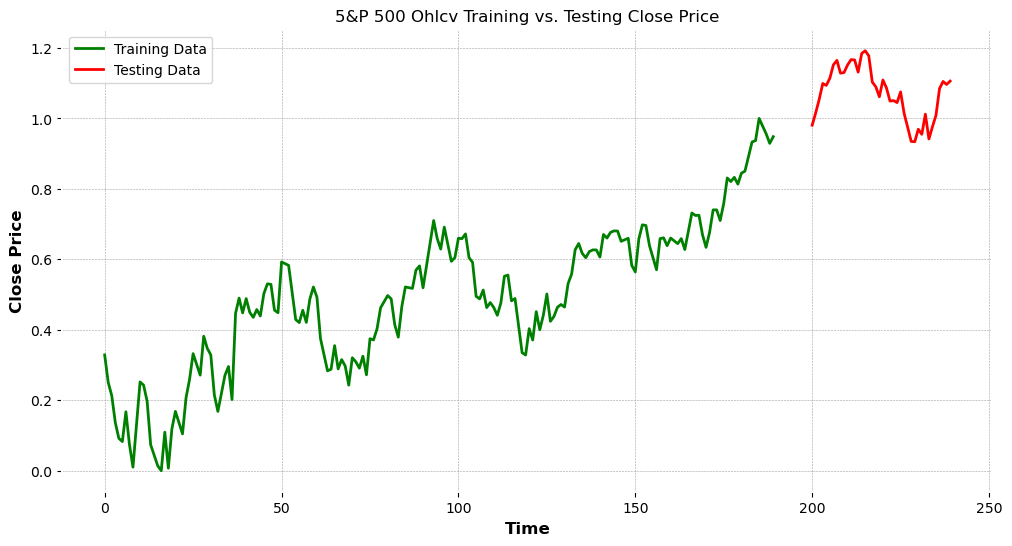

In [135]:
plt.figure(figsize=(12, 6))


# Plot the training data
train_length = len(y_train)
plt.plot(range(train_length), y_train, label='Training Data', color='green')

# Plot the testing data
test_start = train_length + time_steps  # Adjust if necessary
plt.plot(range(test_start, test_start + len(y_test)), y_test, label='Testing Data', color='red')


plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('5&P 500 Ohlcv Training vs. Testing Close Price')
plt.legend()
plt.show()


# Interest_rate

In [ ]:
interest_rate_data = yf.download('^TNX', start=start_date, end=today, interval="1d")
interest_rate_data.to_csv("interest_rate.csv")
interest_rate_data.tail()

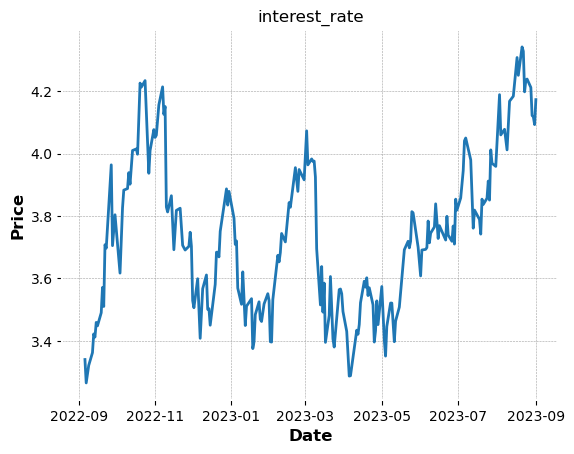

In [137]:
# Plot the trend for close price
plt.grid(True)
plt.plot(interest_rate_data['Close'])
plt.title("interest_rate") 
plt.ylabel("Price")
plt.xlabel("Date")
plt.show()


In [ ]:
import mplfinance as mpf
mpf.plot(interest_rate_data[:100],type="candle",style="charles",figratio=(10,6),mav=(20,40),volume =True, xlabel = "Date", ylabel ="Price", 
         title ="Interest_rate")

## Prepare the data sets (80% training, and 20% testing)

In [ ]:
# Data prepare
# Determine the length of your dataset
data_len = len(interest_rate_data['Close'])

# Calculate the index to split the data (80% train, 20% test)
split_index = int(0.8 * data_len)

# Split the data into training and testing sets
train_data = interest_rate_data['Close'][:split_index]
test_data = interest_rate_data['Close'][split_index:]

# Reshape the data to have a single feature (2D)
train_data = train_data.values.reshape(-1, 1)
test_data = test_data.values.reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test data
train_data_normalized = scaler.fit_transform(train_data)
test_data_normalized = scaler.transform(test_data)

def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Define the number of time steps for your sequences
time_steps = 10

# Create sequences for training and testing data
X_train, y_train = create_sequences(train_data_normalized, time_steps)
X_test, y_test = create_sequences(test_data_normalized, time_steps)



## Build and train the LSTM model 

In [191]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [192]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,verbose=True)

Epoch 1/10
3/3 [==============================] - 10s 611ms/step - loss: 0.1979 - val_loss: 0.5239
Epoch 2/10
3/3 [==============================] - 0s 109ms/step - loss: 0.1770 - val_loss: 0.4730
Epoch 3/10
3/3 [==============================] - 0s 129ms/step - loss: 0.1564 - val_loss: 0.4235
Epoch 4/10
3/3 [==============================] - 0s 122ms/step - loss: 0.1370 - val_loss: 0.3720
Epoch 5/10
3/3 [==============================] - 0s 136ms/step - loss: 0.1170 - val_loss: 0.3159
Epoch 6/10
3/3 [==============================] - 0s 173ms/step - loss: 0.0957 - val_loss: 0.2557
Epoch 7/10
3/3 [==============================] - 1s 337ms/step - loss: 0.0741 - val_loss: 0.1935
Epoch 8/10
3/3 [==============================] - 0s 176ms/step - loss: 0.0538 - val_loss: 0.1304
Epoch 9/10
3/3 [==============================] - 0s 210ms/step - loss: 0.0362 - val_loss: 0.0718
Epoch 10/10
3/3 [==============================] - 0s 97ms/step - loss: 0.0253 - val_loss: 0.0294


In [9]:
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and true values
y_pred = scaler.inverse_transform(y_pred)
y_true = scaler.inverse_transform(y_test)

# Calculate MSE, RMSE, MAE
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_true, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')



NameError: name 'X_test' is not defined

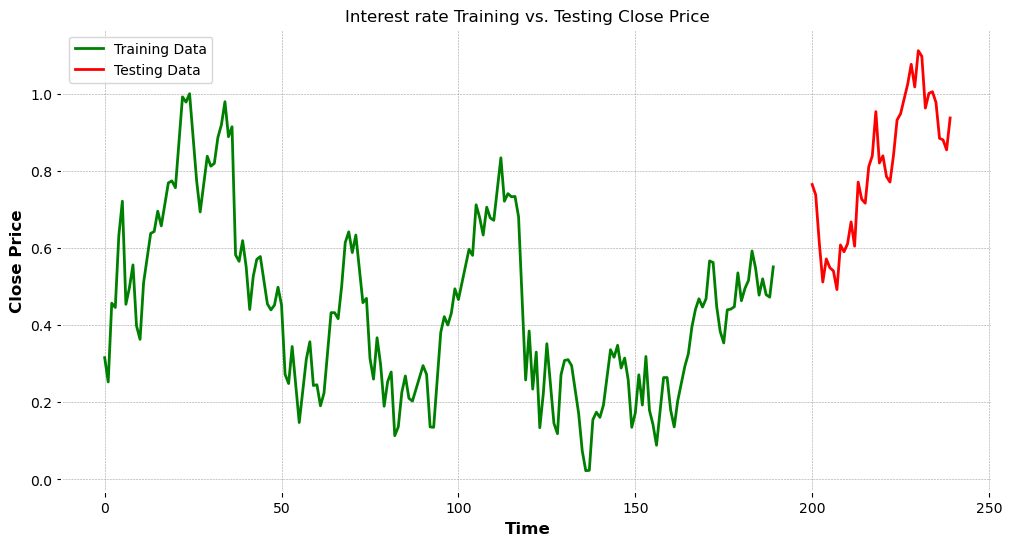

In [143]:
plt.figure(figsize=(12, 6))


# Plot the training data
train_length = len(y_train)
plt.plot(range(train_length), y_train, label='Training Data', color='green')

# Plot the testing data
test_start = train_length + time_steps  # Adjust if necessary
plt.plot(range(test_start, test_start + len(y_test)), y_test, label='Testing Data', color='red')


plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Interest rate Training vs. Testing Close Price')
plt.legend()
plt.show()


## Google_ohlcv

In [10]:
google = yf.download("GOOGL", start=start_date, end=today, interval="1d", actions=True)
google.to_csv("google_ohlcv.csv")
google.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2023-08-29,132.240005,136.570007,132.240005,134.570007,134.570007,43075600,0.0,0.0
2023-08-30,134.779999,136.279999,134.070007,135.880005,135.880005,28315800,0.0,0.0
2023-08-31,136.009995,138.000000,135.789993,136.169998,136.169998,30053800,0.0,0.0
2023-09-01,137.460007,137.460007,134.850006,135.660004,135.660004,21524600,0.0,0.0
2023-09-05,135.440002,136.419998,134.580002,135.770004,135.770004,19377300,0.0,0.0


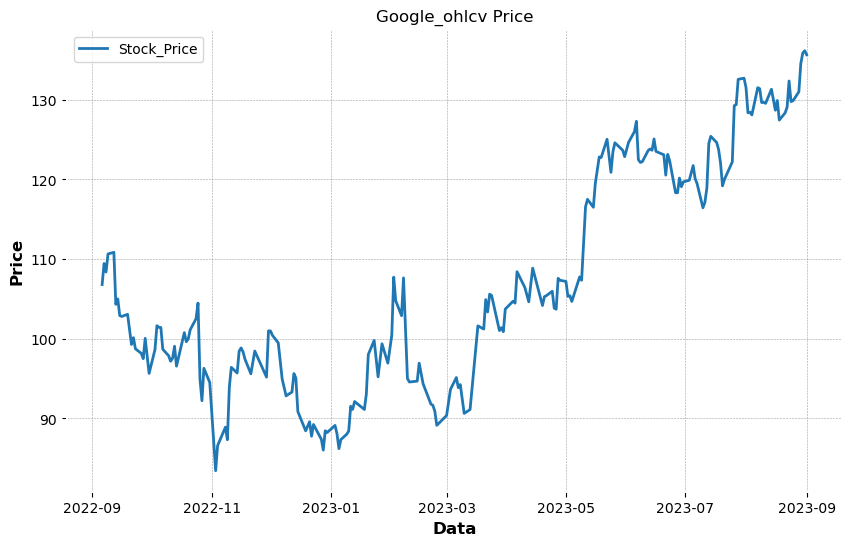

In [145]:
plt.figure(figsize=(10, 6))
plt.plot(google['Close'], label='Stock_Price')
plt.xlabel('Data')
plt.ylabel('Price')
plt.title('Google_ohlcv Price')
plt.legend()
plt.grid(True)
plt.show()

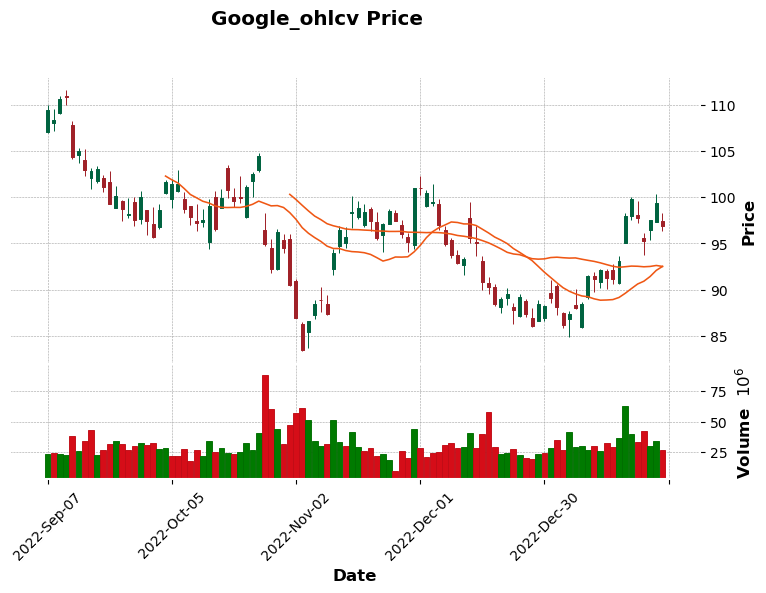

In [11]:
import mplfinance as mpf
mpf.plot(google[:100],type="candle",style="charles",figratio=(10,6),mav=(20,40),volume =True, xlabel = "Date", ylabel ="Price", 
         title ="Google_ohlcv Price")

## Prepare the data sets (80% training, and 20% testing)

In [12]:

# Determine the length of your dataset
data_len = len(google['Close'])

# Calculate the index to split the data (80% train, 20% test)
split_index = int(0.8 * data_len)

# Split the data into training and testing sets
train_data = google['Close'][:split_index]
test_data = google['Close'][split_index:]

# Reshape the data to have a single feature (2D)
train_data = train_data.values.reshape(-1, 1)
test_data = test_data.values.reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test data
train_data_normalized = scaler.fit_transform(train_data)
test_data_normalized = scaler.transform(test_data)

def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Define the number of time steps for your sequences
time_steps = 10

# Create sequences for training and testing data
X_train, y_train = create_sequences(train_data_normalized, time_steps)
X_test, y_test = create_sequences(test_data_normalized, time_steps)


NameError: name 'MinMaxScaler' is not defined

## Build and train the LSTM model 

In [13]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


NameError: name 'X_train' is not defined

In [149]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,verbose=True)

Epoch 1/10
3/3 [==============================] - 6s 426ms/step - loss: 0.1915 - val_loss: 0.8215
Epoch 2/10
3/3 [==============================] - 0s 58ms/step - loss: 0.1646 - val_loss: 0.7199
Epoch 3/10
3/3 [==============================] - 0s 55ms/step - loss: 0.1408 - val_loss: 0.6196
Epoch 4/10
3/3 [==============================] - 0s 57ms/step - loss: 0.1167 - val_loss: 0.5201
Epoch 5/10
3/3 [==============================] - 0s 60ms/step - loss: 0.0936 - val_loss: 0.4226
Epoch 6/10
3/3 [==============================] - 0s 59ms/step - loss: 0.0726 - val_loss: 0.3279
Epoch 7/10
3/3 [==============================] - 0s 58ms/step - loss: 0.0538 - val_loss: 0.2341
Epoch 8/10
3/3 [==============================] - 0s 56ms/step - loss: 0.0360 - val_loss: 0.1451
Epoch 9/10
3/3 [==============================] - 0s 59ms/step - loss: 0.0233 - val_loss: 0.0661
Epoch 10/10
3/3 [==============================] - 0s 54ms/step - loss: 0.0149 - val_loss: 0.0168


In [14]:
y_pred = model.predict(X_test)

# Calculate MSE, RMSE, MAE
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_pred,y_test)

mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')



NameError: name 'X_test' is not defined

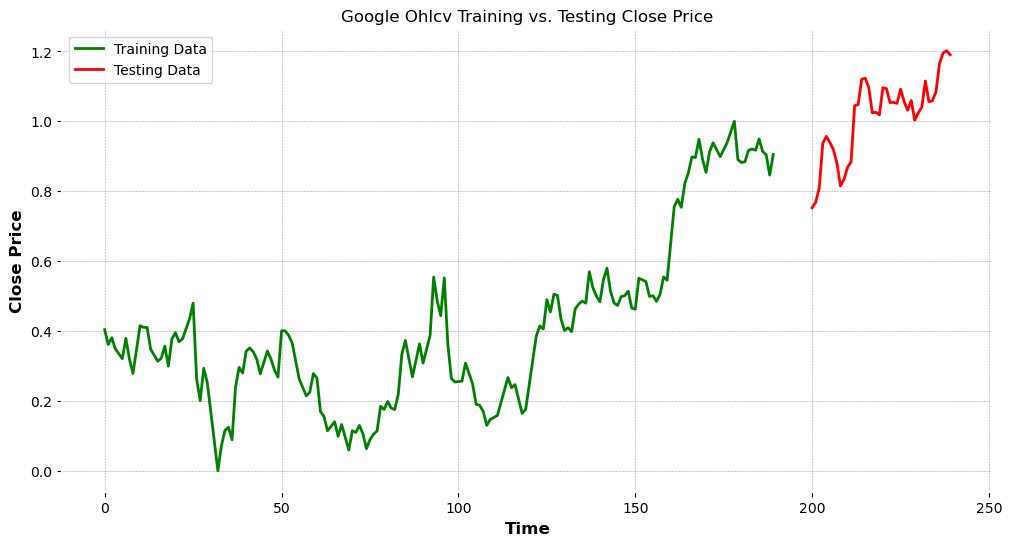

In [151]:
plt.figure(figsize=(12, 6))


# Plot the training data
train_length = len(y_train)
plt.plot(range(train_length), y_train, label='Training Data', color='green')

# Plot the testing data
test_start = train_length + time_steps  # Adjust if necessary
plt.plot(range(test_start, test_start + len(y_test)), y_test, label='Testing Data', color='red')


plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Google Ohlcv Training vs. Testing Close Price')
plt.legend()
plt.show()


## Gold_ohlcv

In [15]:
gold = yf.download("GOLD", start=start_date, end=today, interval="1d")
gold.to_csv("gold_ohlcv.csv")

[*********************100%***********************]  1 of 1 completed


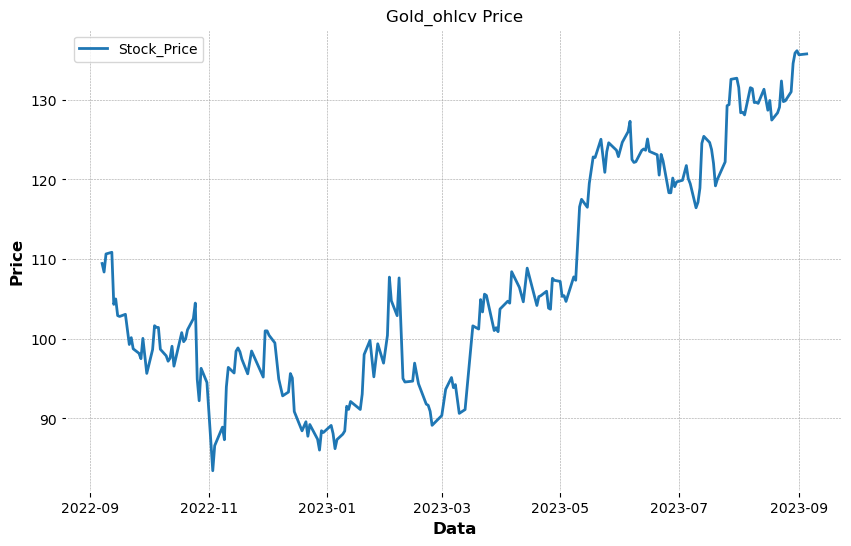

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(google['Close'], label='Stock_Price')
plt.xlabel('Data')
plt.ylabel('Price')
plt.title('Gold_ohlcv Price')
plt.legend()
plt.grid(True)
plt.show()

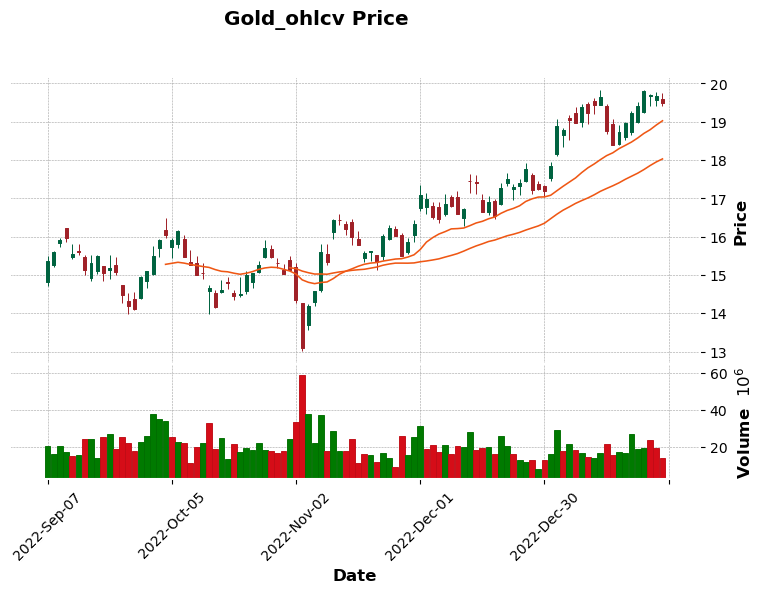

In [17]:
import mplfinance as mpf
mpf.plot(gold[:100],type="candle",style="charles",figratio=(10,6),mav=(20,40),volume =True, xlabel = "Date", ylabel ="Price", 
         title ="Gold_ohlcv Price")

## Prepare the data sets (80% training, and 20% testing)

In [18]:

# Determine the length of your dataset
data_len = len(gold['Close'])

# Calculate the index to split the data (80% train, 20% test)
split_index = int(0.8 * data_len)

# Split the data into training and testing sets
train_data = gold['Close'][:split_index]
test_data = gold['Close'][split_index:]

# Reshape the data to have a single feature (2D)
train_data = train_data.values.reshape(-1, 1)
test_data = test_data.values.reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test data
train_data_normalized = scaler.fit_transform(train_data)
test_data_normalized = scaler.transform(test_data)

def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Define the number of time steps for your sequences
time_steps = 10

# Create sequences for training and testing data
X_train, y_train = create_sequences(train_data_normalized, time_steps)
X_test, y_test = create_sequences(test_data_normalized, time_steps)


NameError: name 'MinMaxScaler' is not defined

## Build and train the LSTM model 

In [19]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


NameError: name 'X_train' is not defined

In [157]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,verbose=True)

Epoch 1/10
3/3 [==============================] - 7s 417ms/step - loss: 0.3364 - val_loss: 0.1976
Epoch 2/10
3/3 [==============================] - 0s 65ms/step - loss: 0.2943 - val_loss: 0.1699
Epoch 3/10
3/3 [==============================] - 0s 57ms/step - loss: 0.2574 - val_loss: 0.1449
Epoch 4/10
3/3 [==============================] - 0s 62ms/step - loss: 0.2219 - val_loss: 0.1210
Epoch 5/10
3/3 [==============================] - 0s 151ms/step - loss: 0.1883 - val_loss: 0.0978
Epoch 6/10
3/3 [==============================] - 0s 90ms/step - loss: 0.1540 - val_loss: 0.0746
Epoch 7/10
3/3 [==============================] - 0s 66ms/step - loss: 0.1199 - val_loss: 0.0510
Epoch 8/10
3/3 [==============================] - 0s 86ms/step - loss: 0.0854 - val_loss: 0.0289
Epoch 9/10
3/3 [==============================] - 0s 107ms/step - loss: 0.0511 - val_loss: 0.0110
Epoch 10/10
3/3 [==============================] - 0s 101ms/step - loss: 0.0241 - val_loss: 0.0043


In [20]:
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and true values
y_pred = scaler.inverse_transform(y_pred)
y_true = scaler.inverse_transform(y_test)

# Calculate MSE, RMSE, MAE
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_true, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')



NameError: name 'X_test' is not defined

In [21]:
plt.figure(figsize=(12, 6))


# Plot the training data
train_length = len(y_train)
plt.plot(range(train_length), y_train, label='Training Data', color='green')

# Plot the testing data
test_start = train_length + time_steps  # Adjust if necessary
plt.plot(range(test_start, test_start + len(y_test)), y_test, label='Testing Data', color='red')


plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Gold Ohlcv Training vs. Testing Close Price')
plt.legend()
plt.show()


NameError: name 'y_train' is not defined

<Figure size 1200x600 with 0 Axes>

## WTI_crude_oil

In [22]:
oil_index = yf.download("WTI", start=start_date, end=today, interval="1d")
oil_index.to_csv("WTI_crude_oil.csv")

[*********************100%***********************]  1 of 1 completed


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


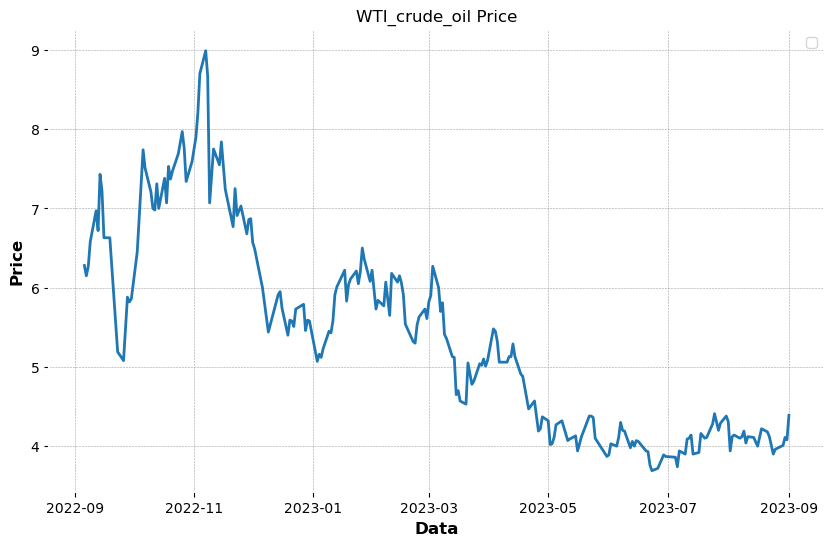

In [161]:
plt.figure(figsize=(10, 6))
plt.plot(oil_index['Close'])
plt.xlabel('Data')
plt.ylabel('Price')
plt.title('WTI_crude_oil Price')
plt.legend()
plt.grid(True)
plt.show()

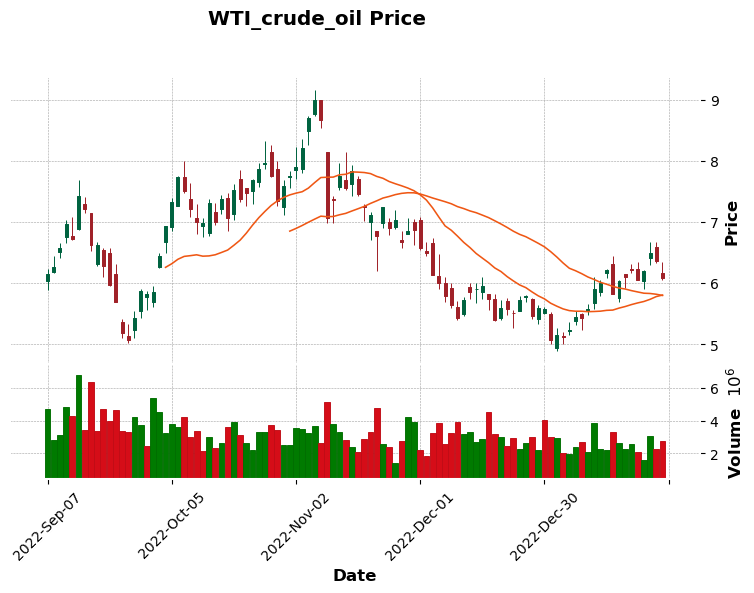

In [23]:
import mplfinance as mpf
mpf.plot(oil_index[:100],type="candle",style="charles",figratio=(10,6),mav=(20,40),volume =True, xlabel = "Date", ylabel ="Price", 
         title ="WTI_crude_oil Price")

## Prepare the data sets (80% training, and 20% testing)

In [24]:

# Determine the length of your dataset
data_len = len(oil_index['Close'])

# Calculate the index to split the data (80% train, 20% test)
split_index = int(0.8 * data_len)

# Split the data into training and testing sets
train_data = oil_index['Close'][:split_index]
test_data = oil_index['Close'][split_index:]

# Reshape the data to have a single feature (2D)
train_data = train_data.values.reshape(-1, 1)
test_data = test_data.values.reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test data
train_data_normalized = scaler.fit_transform(train_data)
test_data_normalized = scaler.transform(test_data)

def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Define the number of time steps for your sequences
time_steps = 10

# Create sequences for training and testing data
X_train, y_train = create_sequences(train_data_normalized, time_steps)
X_test, y_test = create_sequences(test_data_normalized, time_steps)


NameError: name 'MinMaxScaler' is not defined

## Build and train the LSTM model 

In [164]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [165]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,verbose=True)

Epoch 1/10
3/3 [==============================] - 15s 768ms/step - loss: 0.1491 - val_loss: 0.0027
Epoch 2/10
3/3 [==============================] - 0s 74ms/step - loss: 0.1252 - val_loss: 0.0015
Epoch 3/10
3/3 [==============================] - 0s 84ms/step - loss: 0.1026 - val_loss: 7.2662e-04
Epoch 4/10
3/3 [==============================] - 0s 63ms/step - loss: 0.0812 - val_loss: 5.9158e-04
Epoch 5/10
3/3 [==============================] - 0s 72ms/step - loss: 0.0636 - val_loss: 0.0013
Epoch 6/10
3/3 [==============================] - 0s 68ms/step - loss: 0.0462 - val_loss: 0.0029
Epoch 7/10
3/3 [==============================] - 0s 72ms/step - loss: 0.0309 - val_loss: 0.0057
Epoch 8/10
3/3 [==============================] - 0s 69ms/step - loss: 0.0185 - val_loss: 0.0096
Epoch 9/10
3/3 [==============================] - 0s 167ms/step - loss: 0.0124 - val_loss: 0.0137
Epoch 10/10
3/3 [==============================] - 1s 325ms/step - loss: 0.0120 - val_loss: 0.0154


In [166]:
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and true values
y_pred = scaler.inverse_transform(y_pred)
y_true = scaler.inverse_transform(y_test)

# Calculate MSE, RMSE, MAE
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_true, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')



2/2 [==============================] - 2s 10ms/step
MSE: 0.42033739749446825
RMSE: 0.6483343254020014
MAE: 0.6357701480388641
MAPE: 15.535187259554501%


In [25]:
plt.figure(figsize=(12, 6))


# Plot the training data
train_length = len(y_train)
plt.plot(range(train_length), y_train, label='Training Data', color='green')

# Plot the testing data
test_start = train_length + time_steps  # Adjust if necessary
plt.plot(range(test_start, test_start + len(y_test)), y_test, label='Testing Data', color='red')


plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('WTI Crude oil Training vs. Testing Close Price')
plt.legend()
plt.show()


NameError: name 'y_train' is not defined

<Figure size 1200x600 with 0 Axes>

## Brent_oil

In [26]:
# Download Brent Crude Oil  price data
brent_index = yf.download("BZ", start=start_date, end=today, interval="1d")
brent_index.to_csv("brent_oil.csv")

[*********************100%***********************]  1 of 1 completed


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


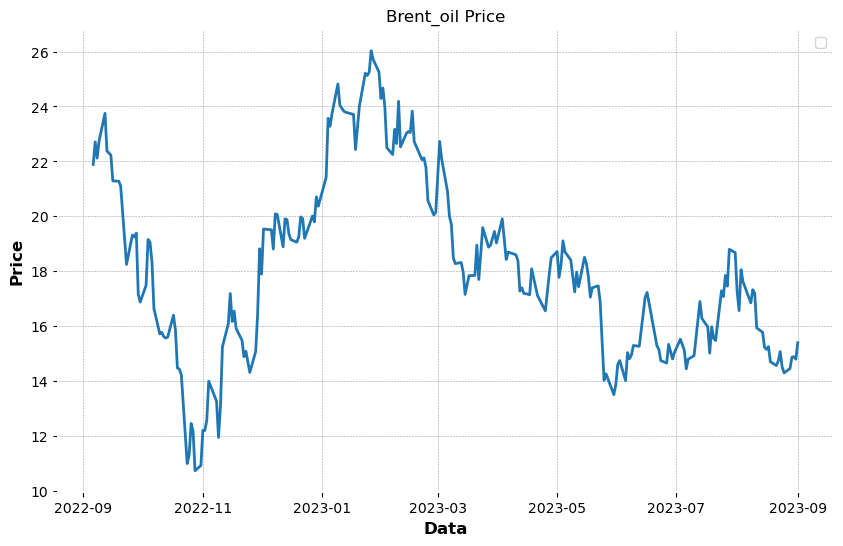

In [169]:
plt.figure(figsize=(10, 6))
plt.plot(brent_index['Close'])
plt.xlabel('Data')
plt.ylabel('Price')
plt.title('Brent_oil Price')
plt.legend()
plt.grid(True)
plt.show()

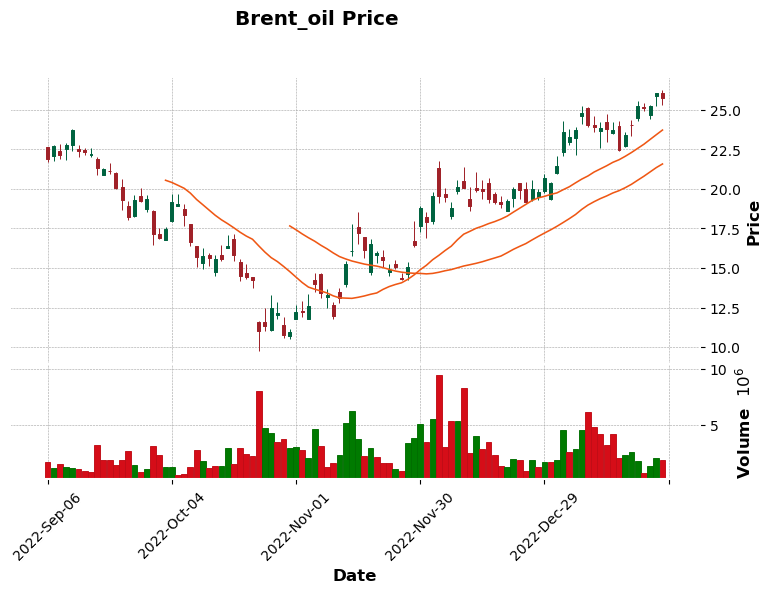

In [170]:
import mplfinance as mpf
mpf.plot(brent_index[:100],type="candle",style="charles",figratio=(10,6),mav=(20,40),volume =True, xlabel = "Date", ylabel ="Price", 
         title ="Brent_oil Price")

## Prepare the data sets (80% training, and 20% testing)

In [171]:

# Determine the length of your dataset
data_len = len(brent_index['Close'])

# Calculate the index to split the data (80% train, 20% test)
split_index = int(0.8 * data_len)

# Split the data into training and testing sets
train_data = brent_index['Close'][:split_index]
test_data = brent_index['Close'][split_index:]

# Reshape the data to have a single feature (2D)
train_data = train_data.values.reshape(-1, 1)
test_data = test_data.values.reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test data
train_data_normalized = scaler.fit_transform(train_data)
test_data_normalized = scaler.transform(test_data)

def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Define the number of time steps for your sequences
time_steps = 10

# Create sequences for training and testing data
X_train, y_train = create_sequences(train_data_normalized, time_steps)
X_test, y_test = create_sequences(test_data_normalized, time_steps)


## Build and train the LSTM model 

In [172]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [173]:

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,verbose=True)

Epoch 1/10
3/3 [==============================] - 12s 514ms/step - loss: 0.3111 - val_loss: 0.1163
Epoch 2/10
3/3 [==============================] - 0s 61ms/step - loss: 0.2677 - val_loss: 0.0980
Epoch 3/10
3/3 [==============================] - 0s 61ms/step - loss: 0.2315 - val_loss: 0.0831
Epoch 4/10
3/3 [==============================] - 0s 162ms/step - loss: 0.2013 - val_loss: 0.0695
Epoch 5/10
3/3 [==============================] - 0s 139ms/step - loss: 0.1727 - val_loss: 0.0561
Epoch 6/10
3/3 [==============================] - 0s 93ms/step - loss: 0.1458 - val_loss: 0.0426
Epoch 7/10
3/3 [==============================] - 0s 184ms/step - loss: 0.1171 - val_loss: 0.0295
Epoch 8/10
3/3 [==============================] - 0s 123ms/step - loss: 0.0866 - val_loss: 0.0176
Epoch 9/10
3/3 [==============================] - 0s 114ms/step - loss: 0.0584 - val_loss: 0.0086
Epoch 10/10
3/3 [==============================] - 0s 81ms/step - loss: 0.0317 - val_loss: 0.0048


In [174]:
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and true values
y_pred = scaler.inverse_transform(y_pred)
y_true = scaler.inverse_transform(y_test)

# Calculate MSE, RMSE, MAE
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_true, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')



2/2 [==============================] - 1s 7ms/step
MSE: 1.1322327534460328
RMSE: 1.064064261896824
MAE: 0.8846790313720703
MAPE: 5.465640425683355%


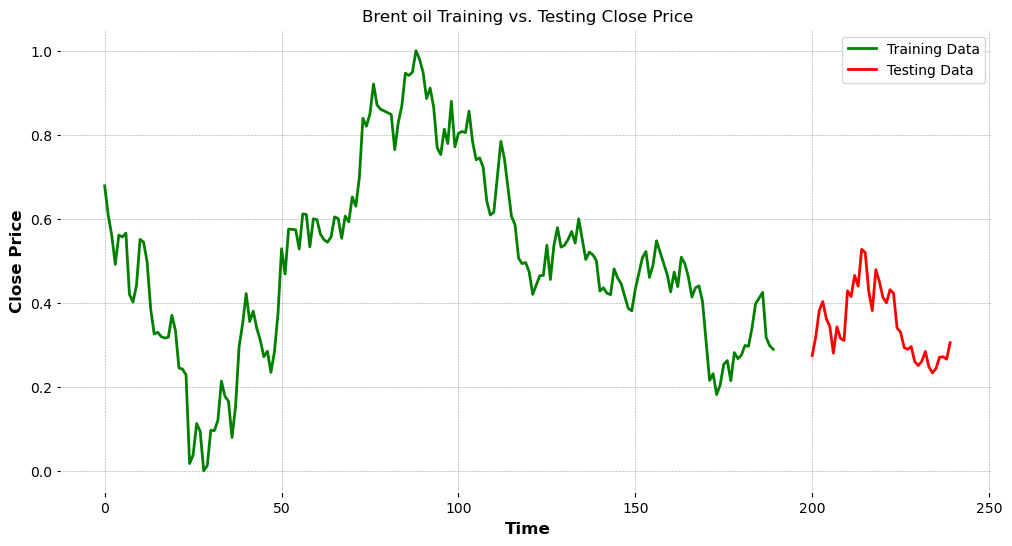

In [175]:
plt.figure(figsize=(12, 6))


# Plot the training data
train_length = len(y_train)
plt.plot(range(train_length), y_train, label='Training Data', color='green')

# Plot the testing data
test_start = train_length + time_steps  # Adjust if necessary
plt.plot(range(test_start, test_start + len(y_test)), y_test, label='Testing Data', color='red')


plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Brent oil Training vs. Testing Close Price')
plt.legend()
plt.show()


## Inflation

In [176]:
import quandl

series_code = 'RATEINF/INFLATION_USA'  # Inflation rate for the United States

quandl.ApiConfig.api_key = 'rDiMn9PdvubsoUDWxrsu'
inflation = quandl.get(series_code, start_date="2020-01-01", end_date=today)
inflation.to_csv("Inflation.csv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


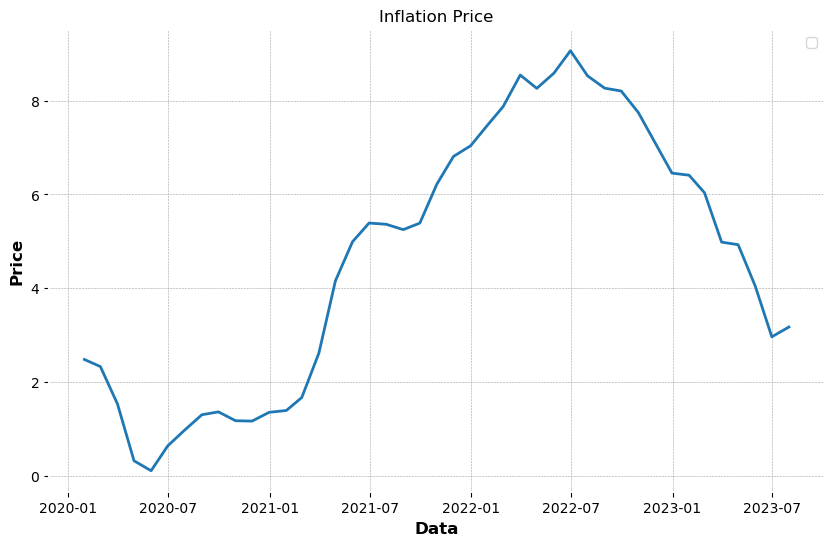

In [177]:
plt.figure(figsize=(10, 6))
plt.plot(inflation)
plt.xlabel('Data')
plt.ylabel('Price')
plt.title('Inflation Price')
plt.legend()
plt.grid(True)
plt.show()

In [178]:

# Determine the length of your dataset
data_len = len(inflation)

# Calculate the index to split the data (80% train, 20% test)
split_index = int(0.8 * data_len)

# Split the data into training and testing sets
train_data = inflation[:split_index]
test_data = inflation[split_index:]

# Reshape the data to have a single feature (2D)
train_data = train_data.values.reshape(-1, 1)
test_data = test_data.values.reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test data
train_data_normalized = scaler.fit_transform(train_data)
test_data_normalized = scaler.transform(test_data)

def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Define the number of time steps for your sequences
time_steps = 10

# Create sequences for training and testing data
X_train, y_train = create_sequences(train_data_normalized, time_steps)
X_test, y_test = create_sequences(test_data_normalized, time_steps)


model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [179]:

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,verbose=True)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.0779
Epoch 2/10
1/1 [==============================] - 0s 213ms/step - loss: 0.0637
Epoch 3/10
1/1 [==============================] - 0s 312ms/step - loss: 0.0503
Epoch 4/10
1/1 [==============================] - 0s 150ms/step - loss: 0.0382
Epoch 5/10
1/1 [==============================] - 0s 174ms/step - loss: 0.0284
Epoch 6/10
1/1 [==============================] - 0s 117ms/step - loss: 0.0216
Epoch 7/10
1/1 [==============================] - 0s 118ms/step - loss: 0.0187
Epoch 8/10
1/1 [==============================] - 0s 111ms/step - loss: 0.0201
Epoch 9/10
1/1 [==============================] - 0s 113ms/step - loss: 0.0250
Epoch 10/10
1/1 [==============================] - 0s 152ms/step - loss: 0.0310


In [180]:
y_pred = model.predict(X_train)

# Calculate MSE, RMSE, MAE
mse = mean_squared_error(y_pred, y_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_pred,y_train)

mape = mean_absolute_percentage_error(y_train, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')



1/1 [==============================] - 0s 214ms/step
MSE: 0.035086423580826094
RMSE: 0.1873137036653381
MAE: 0.13824965600400643
MAPE: 43.20621341709088%


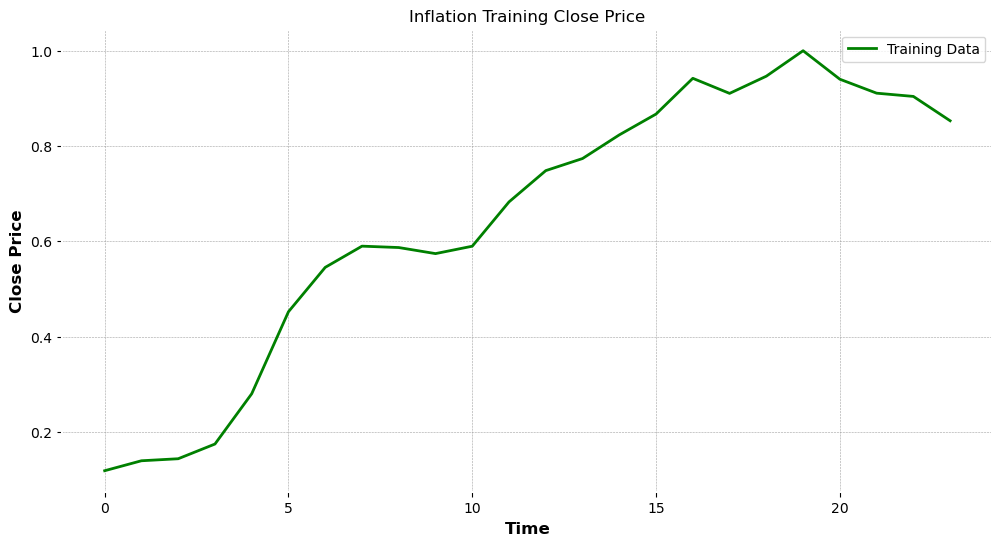

In [181]:
plt.figure(figsize=(12, 6))


# Plot the training data
train_length = len(y_train)
plt.plot(range(train_length), y_train, label='Training Data', color='green')




plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Inflation Training Close Price')
plt.legend()
plt.show()


## Bitcoin_ohlcv

In [182]:
# Download Brent Crude Oil  price data
bitcoin = yf.download("bit", start=start_date, end=today, interval="1d")
bitcoin.to_csv("brent_oil.csv")

[*********************100%***********************]  1 of 1 completed


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


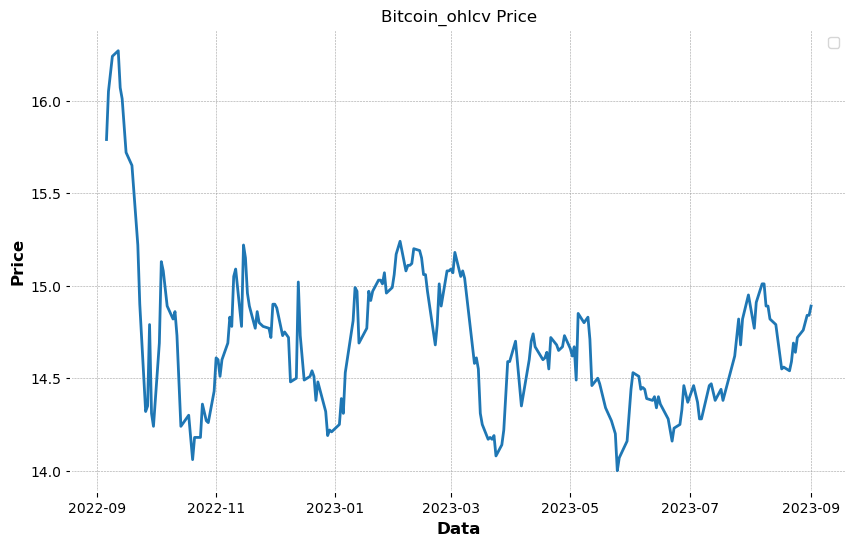

In [183]:
plt.figure(figsize=(10, 6))
plt.plot(bitcoin['Close'])
plt.xlabel('Data')
plt.ylabel('Price')
plt.title('Bitcoin_ohlcv Price')
plt.legend()
plt.grid(True)
plt.show()

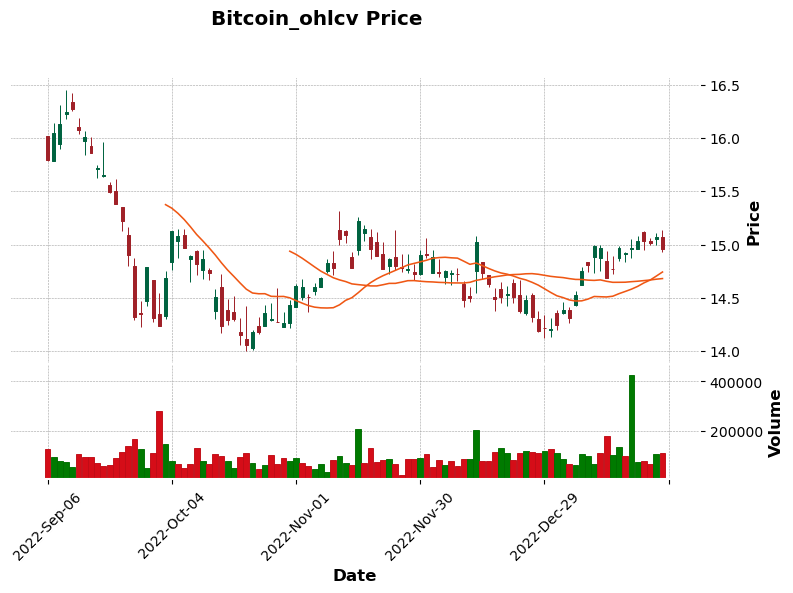

In [184]:
import mplfinance as mpf
mpf.plot(bitcoin[:100],type="candle",style="charles",figratio=(10,6),mav=(20,40),volume =True, xlabel = "Date", ylabel ="Price", 
         title ="Bitcoin_ohlcv Price")

## Prepare the data sets (80% training, and 20% testing)

In [185]:

# Determine the length of your dataset
data_len = len(bitcoin['Close'])

# Calculate the index to split the data (80% train, 20% test)
split_index = int(0.8 * data_len)

# Split the data into training and testing sets
train_data = bitcoin['Close'][:split_index]
test_data = bitcoin['Close'][split_index:]

# Reshape the data to have a single feature (2D)
train_data = train_data.values.reshape(-1, 1)
test_data = test_data.values.reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test data
train_data_normalized = scaler.fit_transform(train_data)
test_data_normalized = scaler.transform(test_data)

def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Define the number of time steps for your sequences
time_steps = 10

# Create sequences for training and testing data
X_train, y_train = create_sequences(train_data_normalized, time_steps)
X_test, y_test = create_sequences(test_data_normalized, time_steps)


## Build and train the LSTM model 

In [186]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [187]:

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,verbose=True)

Epoch 1/10
3/3 [==============================] - 9s 431ms/step - loss: 0.1061 - val_loss: 0.0895
Epoch 2/10
3/3 [==============================] - 0s 58ms/step - loss: 0.0907 - val_loss: 0.0762
Epoch 3/10
3/3 [==============================] - 0s 59ms/step - loss: 0.0778 - val_loss: 0.0654
Epoch 4/10
3/3 [==============================] - 0s 55ms/step - loss: 0.0668 - val_loss: 0.0557
Epoch 5/10
3/3 [==============================] - 0s 53ms/step - loss: 0.0571 - val_loss: 0.0464
Epoch 6/10
3/3 [==============================] - 0s 59ms/step - loss: 0.0479 - val_loss: 0.0371
Epoch 7/10
3/3 [==============================] - 0s 63ms/step - loss: 0.0388 - val_loss: 0.0279
Epoch 8/10
3/3 [==============================] - 0s 57ms/step - loss: 0.0304 - val_loss: 0.0189
Epoch 9/10
3/3 [==============================] - 0s 55ms/step - loss: 0.0224 - val_loss: 0.0110
Epoch 10/10
3/3 [==============================] - 0s 57ms/step - loss: 0.0165 - val_loss: 0.0058


In [188]:
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and true values
y_pred = scaler.inverse_transform(y_pred)
y_true = scaler.inverse_transform(y_test)

# Calculate MSE, RMSE, MAE
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_true, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')



2/2 [==============================] - 2s 13ms/step
MSE: 0.029871282792646586
RMSE: 0.17283310676096345
MAE: 0.14972295761108417
MAPE: 1.014506641829788%


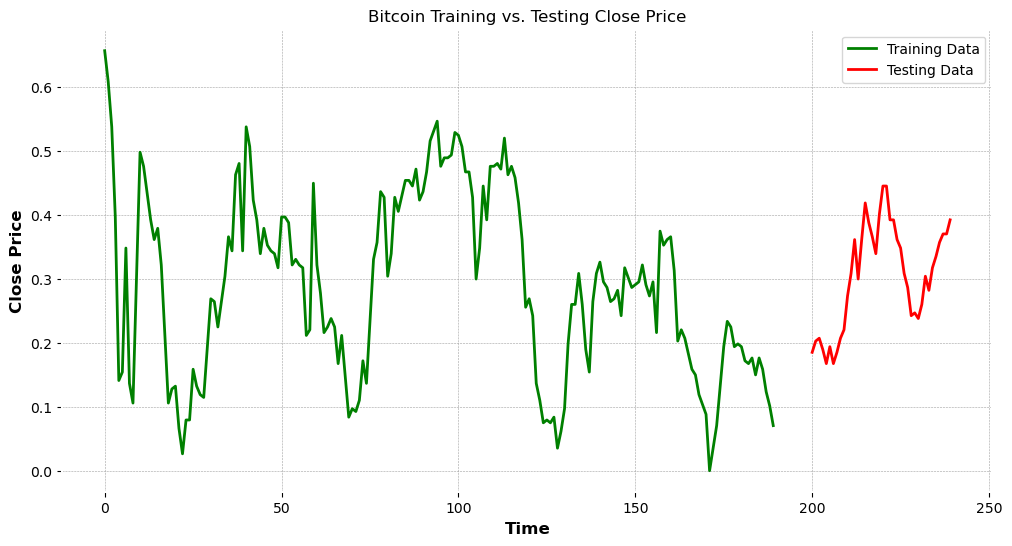

In [189]:
plt.figure(figsize=(12, 6))


# Plot the training data
train_length = len(y_train)
plt.plot(range(train_length), y_train, label='Training Data', color='green')

# Plot the testing data
test_start = train_length + time_steps  # Adjust if necessary
plt.plot(range(test_start, test_start + len(y_test)), y_test, label='Testing Data', color='red')


plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Bitcoin Training vs. Testing Close Price')
plt.legend()
plt.show()
